In [8]:
import pandas as pd
from collections import Counter
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

In [2]:
df = pd.read_csv('../GSE121893_heart_4933_cells_ssi.csv')
Counter(df['sc_type'])

Counter({'Pericytes': 2382,
         'Endothelium': 1157,
         'Lymphatic': 625,
         'Macrophages': 349,
         'Fibroblasts': 303,
         'Smooth_Muscle': 63,
         'T_Cells': 35,
         'NK_Cells': 9,
         'Monocytes': 6,
         'Neurons': 4})

In [3]:
df['sc_type'].unique()


array(['Pericytes', 'Endothelium', 'Lymphatic', 'Macrophages',
       'Fibroblasts', 'T_Cells', 'Smooth_Muscle', 'Monocytes', 'NK_Cells',
       'Neurons'], dtype=object)

In [4]:
adata_st = sc.read_h5ad('../GSE121893_heart_4933_cells_ssi.h5ad')
adata_st

AnnData object with n_obs × n_vars = 4933 × 25742
    obs: 'nGene', 'nUMI', 'condition', 'group', 'sample', 'cell_type', 'Age', 'sc_type', 'confidence'
    uns: 'data_source', 'paper'

In [5]:
Counter(adata_st.obs['cell_type'])

Counter({'LA1': 437,
         'LV3': 299,
         'EC7': 285,
         'EC5': 273,
         'LV5': 256,
         'EC6': 243,
         'EC4': 237,
         'EC2': 212,
         'LA4': 207,
         'LV2': 189,
         'EC1': 186,
         'EC3': 177,
         'LV1': 173,
         'LA5': 170,
         'LA2': 140,
         'FB2': 116,
         'SMC1': 114,
         'FB4': 110,
         'SMC2': 103,
         'FB3': 101,
         'SMC3': 100,
         'FB1': 99,
         'LA3': 86,
         'AV': 77,
         'SMC5': 69,
         'FB5': 67,
         'LV7': 59,
         'SMC4': 57,
         'MP1': 53,
         'MP4': 53,
         'LA6': 44,
         'LV4': 41,
         'MP2': 38,
         'MP3': 31,
         'LV6': 28,
         'FB6': 3})

In [7]:
cell_type_mapping = {
    'AV': 'Pericytes',
    'EC1': 'Endothelium',
    'EC2': 'Endothelium',
    'EC3': 'Endothelium',
    'EC4': 'Endothelium',
    'EC5': 'Endothelium',
    'EC6': 'Endothelium',
    'EC7': 'Endothelium',
    'FB1': 'Fibroblasts',
    'FB2': 'Fibroblasts',
    'FB3': 'Fibroblasts',
    'FB4': 'Fibroblasts',
    'FB5': 'Fibroblasts',
    'FB6': 'Fibroblasts',
    'LA1': 'Unknown',
    'LA2': 'Unknown',
    'LA3': 'Unknown',
    'LA4': 'Unknown',
    'LA5': 'Unknown',
    'LA6': 'Unknown',
    'LV1': 'Unknown',
    'LV2': 'Unknown',
    'LV3': 'Unknown',
    'LV4': 'Unknown',
    'LV5': 'Unknown',
    'LV6': 'Unknown',
    'LV7': 'Unknown',
    'MP1': 'Macrophages',
    'MP2': 'Macrophages',
    'MP3': 'Macrophages',
    'MP4': 'Macrophages',
    'SMC1': 'Smooth_Muscle',
    'SMC2': 'Smooth_Muscle',
    'SMC3': 'Smooth_Muscle',
    'SMC4': 'Smooth_Muscle',
    'SMC5': 'Smooth_Muscle'
}
adata_st.obs.loc[:, 'cell_type_mapped'] = [cell_type_mapping[x] for x in adata_st.obs['cell_type']]

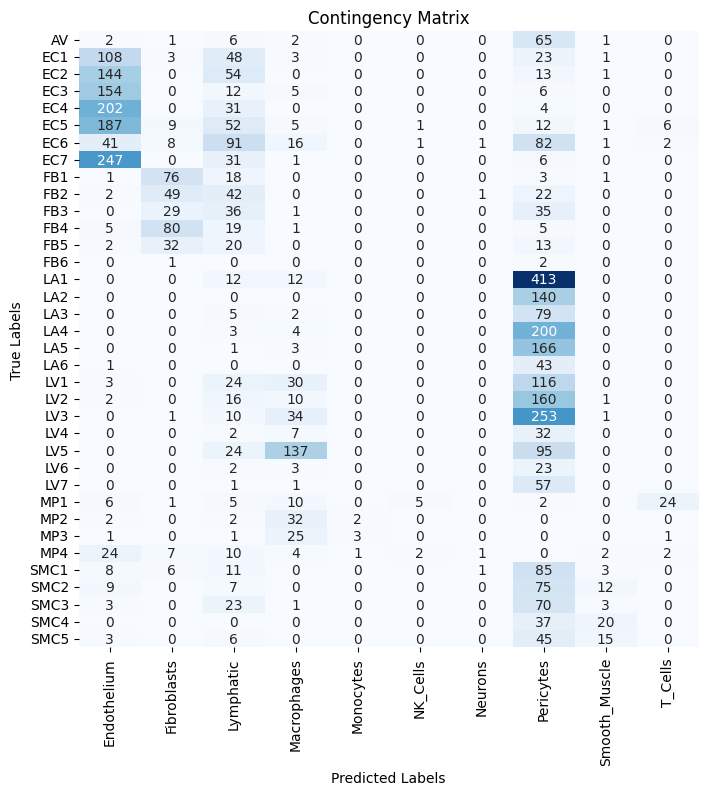

In [9]:
cm = contingency_matrix(adata_st.obs.loc[:, 'cell_type'], adata_st.obs.loc[:, 'sc_type'])
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(adata_st.obs.loc[:, 'cell_type'])
class_labels_x = np.unique(adata_st.obs.loc[:, 'sc_type'])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Contingency Matrix")
plt.show()

In [10]:
# Calculate marker genes
sc.pp.normalize_total(adata_st, target_sum=1e4)
sc.pp.log1p(adata_st)
adata_st.var_names_make_unique()
sc.tl.rank_genes_groups(adata_st, groupby='sc_type', use_raw=False)

In [11]:
markers_df = pd.DataFrame(adata_st.uns["rank_genes_groups"]["names"])
pval_df = pd.DataFrame(adata_st.uns["rank_genes_groups"]["pvals_adj"])
markers_per_type_dict = {}
for col in markers_df.columns:
    markers_per_type_dict[col] = markers_df.loc[pval_df[col] < 0.05, col].values
len(markers_per_type_dict['Neurons'])

18575

In [12]:

# Tyrosine Hydroxylase (TH):
# Explanation: TH is commonly associated with the synthesis of catecholamines, including norepinephrine. Neurons expressing TH are often related to the sympathetic nervous system, which influences cardiac function.
# Reference: Goldstein, D. S., & Eisenhofer, G. (2011). A clinical perspective: Autonomic failure as the key initial feature of Parkinson's disease. Neurology, 77(6), 552-558.


# Choline Acetyltransferase (CHAT):
# Explanation: CHAT is involved in acetylcholine synthesis, a neurotransmitter found in parasympathetic neurons that regulate heart rate.
# Reference: Gibbons, D. D., & Kreider, M. S. (1987). The synthesis and localization of acetylcholine in the heart. Journal of Neuroscience Research, 18(2), 157-167.

# Vasoactive Intestinal Peptide (VIP):
# Explanation: VIP is a neurotransmitter found in some intrinsic cardiac neurons, playing a role in neurotransmission.
# Reference: Suleiman, S. A., et al. (2003). Cardiac neuronal hierarchy in health and disease. American Journal of Physiology-Heart and Circulatory Physiology, 285(5), H1774-H1781.

# Nitric Oxide Synthase 1 (NOS1):
# Explanation: NOS1 is involved in nitric oxide production, and its expression in neurons suggests a role in cardiac regulation.
# Reference: Kanai, A. J., et al. (2001). Neuronal nitric oxide synthase modulates basal and β-adrenergic-stimulated contractility in murine ventricular myocytes. Circulation, 104(25), 2962-2967.

# Calretinin:
# Explanation: Calretinin is a calcium-binding protein found in some cardiac neurons, indicating a neuronal population.
# Reference: Sabrià, J., et al. (2005). Calretinin, parvalbumin, and calbindin-D28k in human heart. An immunohistochemical study. Annals of Anatomy - Anatomischer Anzeiger, 187(4), 321-328.

# HuC/HuD (Neuronal RNA-binding proteins):
# Explanation: HuC/HuD are neuronal RNA-binding proteins expressed in various neuronal populations.
# Reference: Marusich, M. F., et al. (1994). Cloning and characterization of HuR, a ubiquitously expressed Elav-like protein. Journal of Biological Chemistry, 269(26), 20796-20802.

# Neurofilament Proteins (NEFL, NEFM, NEFH):
# Explanation: Neurofilament proteins are structural components of neurons, providing support to the cell.
# Reference: Lee, M. K., & Cleveland, D. W. (1996). Neuronal intermediate filaments. Annual Review of Neuroscience, 19, 187-217.


neuron_heart_marker_genes = [
    "TH",           # Tyrosine Hydroxylase
    "CHAT",         # Choline Acetyltransferase
    "VIP",          # Vasoactive Intestinal Peptide
    "NOS1",         # Nitric Oxide Synthase 1
    #"Calretinin",   # Calretinin  NOT present
    #"HuC/HuD",      # Neuronal RNA-binding proteins  NOT present
    "NEFL",         # Neurofilament Light (NEFL)
    "NEFM",         # Neurofilament Medium (NEFM)
    "NEFH"          # Neurofilament Heavy (NEFH)
]
for gene in neuron_heart_marker_genes:
    out = ''
    if gene not in markers_per_type_dict['Neurons']:
        out = 'NOT MARKER '
    out += '{}: p-val = {}'.format(gene, pval_df.loc[ markers_df[markers_df['Neurons'] == gene].index, 'Neurons' ].values[0])
    print(out)


TH: p-val = 1.760185428349761e-07
CHAT: p-val = 0.004566187776046773
NOT MARKER VIP: p-val = 0.6762994187363754
NOS1: p-val = 1.002778133179301e-14
NEFL: p-val = 0.006659198986241951
NEFM: p-val = 2.2976123794008144e-05
NEFH: p-val = 7.00807167942566e-05


In [14]:
adata_st.obs

,nGene,nUMI,condition,group,sample,cell_type,Age,sc_type,confidence,cell_type_mapped
cell_id,,,,,,,,,,
SC_96279_36_11,2906,13496,cHF_LA,CM,C1,LA1,63,Pericytes,0.50,Unknown
SC_96279_69_44,551,2204,cHF_LV,NCM,C1,EC2,63,Endothelium,0.85,Endothelium
SC_96279_31_1,621,1263,cHF_LA,NCM,C1,SMC3,63,Pericytes,0.85,Smooth_Muscle
SC_96279_69_27,2925,19352,cHF_LA,NCM,C1,EC7,63,Endothelium,0.95,Endothelium
SC_96279_36_65,2275,9878,cHF_LA,CM,C1,EC6,63,Pericytes,0.55,Endothelium
...,...,...,...,...,...,...,...,...,...,...
SC_105235_33_4,2592,41230,N_LV,NCM,N14,EC4,42,Lymphatic,0.55,Endothelium
SC_105235_39_66,1564,29728,N_LV,NCM,N14,SMC4,42,Pericytes,0.40,Smooth_Muscle
SC_105235_4_18,1911,27230,N_LV,NCM,N14,FB3,42,Fibroblasts,0.65,Fibroblasts


In [16]:
adata_st.obs[adata_st.obs['sc_type'] == 'Neurons']

,nGene,nUMI,condition,group,sample,cell_type,Age,sc_type,confidence,cell_type_mapped
cell_id,,,,,,,,,,
SC_96355_70_32,2578,12948,dHF_LV,NCM,D2,SMC1,51,Neurons,0.65,Smooth_Muscle
SC_96355_30_16,4785,131641,dHF_LV,NCM,D2,MP4,51,Neurons,0.45,Macrophages
SC_96407_54_70,1029,4926,dHF_LA,NCM,D2,FB2,51,Neurons,0.35,Fibroblasts
SC_96407_27_68,1207,4129,dHF_LA,NCM,D2,EC6,51,Neurons,0.65,Endothelium


<Axes: xlabel='confidence', ylabel='Count'>

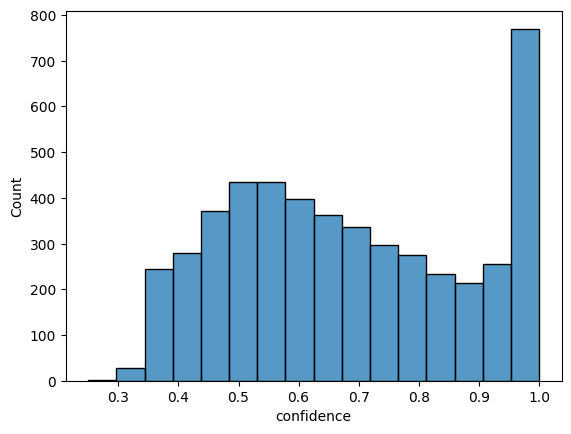

In [17]:
sns.histplot(adata_st.obs['confidence'])